In [1]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

In [2]:
all_images = []
all_labels = []

for i , file in enumerate(glob.glob('ck_plus\\*\\*')) :
    img = cv.imread(file)
    try :
        img = img/255.0
        
        all_images.append(img)
                
        label = file.split('\\')[-2]
        all_labels.append(label)
    except :
        pass
    

all_labels

['anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',


In [3]:
le = LabelEncoder()
all_labels_le = le.fit_transform(all_labels)

all_labels_le = to_categorical(all_labels_le)

all_labels_le

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [4]:
all_images = np.array(all_images)

X_train , X_test , y_train , y_test = train_test_split(all_images , all_labels_le , test_size=0.2 ,random_state=120)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (784, 48, 48, 3)
X_test :  (197, 48, 48, 3)
y_train :  (784, 7)
y_test :  (197, 7)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3) ,activation ='relu' , input_shape=(48, 48, 3)),
    layers.Conv2D(32, (3,3) ,activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3,3) ,activation ='relu'),
    layers.Conv2D(64, (3,3) ,activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(32,activation ='relu'),
    layers.Dense(7,activation ='softmax')
])

model.compile(optimizer='sgd' ,loss = "categorical_crossentropy", metrics =['accuracy'])

In [6]:
H = model.fit(X_train ,y_train , validation_data=(X_test,y_test) , epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 7s 222ms/step - loss: 1.8264 - accuracy: 0.3648 - val_loss: 1.8588 - val_accuracy: 0.1827
Epoch 2/10
25/25 [==============================] - 5s 201ms/step - loss: 1.1754 - accuracy: 0.5829 - val_loss: 1.8900 - val_accuracy: 0.2843
Epoch 3/10
25/25 [==============================] - 5s 200ms/step - loss: 0.8443 - accuracy: 0.6926 - val_loss: 1.9522 - val_accuracy: 0.1929
Epoch 4/10
25/25 [==============================] - 5s 203ms/step - loss: 0.6021 - accuracy: 0.7934 - val_loss: 2.1028 - val_accuracy: 0.0609
Epoch 5/10
25/25 [==============================] - 5s 207ms/step - loss: 0.4293 - accuracy: 0.8546 - val_loss: 2.2004 - val_accuracy: 0.0558
Epoch 6/10
25/25 [==============================] - 5s 210ms/step - loss: 0.2477 - accuracy: 0.9235 - val_loss: 2.4966 - val_accuracy: 0.0457
Epoch 7/10
25/25 [==============================] - 5s 204ms/step - loss: 0.1984 - accuracy: 0.9337 - val_loss: 2.5711 - val_accuracy: 0.0457
Epoch 

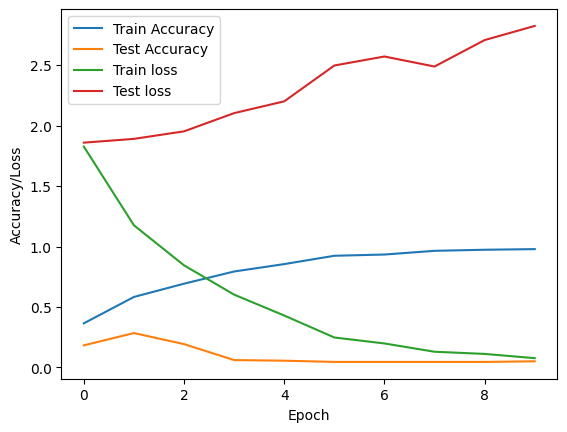

In [7]:
plt.plot(H.history['accuracy'] , label='Train Accuracy')
plt.plot(H.history['val_accuracy'] , label='Test Accuracy')

plt.plot(H.history['loss'] , label='Train loss')
plt.plot(H.history['val_loss'] , label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [8]:
model.save('ck_plus_model.h5')